# Ramadan Abdunabi
## Week 15 - 05/1/2025
### Python Data Cleaning and Visualization Project - Python Stock Market Project


In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import *

# These are the plotting modules and libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Command so that plots appear in the same iPython Notebook
%matplotlib inline

In [2]:
#Upload dataset from a csv file
data = pd.read_csv('AMZN.csv')

In [3]:
data

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/3/2012,yahoo,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,amazon
1,1/4/2012,yahoo,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,amazon
2,1/5/2012,yahoo,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,amazon
3,1/6/2012,yahoo,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,amazon
4,1/9/2012,yahoo,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,amazon
...,...,...,...,...,...,...,...,...,...
2237,11/20/2020,yahoo,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,amazon
2238,11/23/2020,yahoo,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,amazon
2239,11/24/2020,yahoo,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100,amazon
2240,11/25/2020,yahoo,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400,amazon


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242 entries, 0 to 2241
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2242 non-null   object 
 1   Source     2242 non-null   object 
 2   Open       2241 non-null   float64
 3   High       2240 non-null   float64
 4   Low        2242 non-null   float64
 5   Close      2239 non-null   float64
 6   Adj Close  2241 non-null   float64
 7   Volume     2242 non-null   int64  
 8   Stock      2242 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 157.8+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2241.000000,2240.000000,2242.000000,2239.000000,2241.000000,2.242000e+03
mean,991.401419,1002.190218,979.221717,991.895355,991.190696,4.118187e+06
std,802.269032,811.968123,790.843600,801.664757,801.654109,2.278888e+06
min,173.809998,178.250000,172.000000,175.929993,175.929993,0.000000e+00
25%,320.359985,323.687500,315.807487,321.385010,320.510010,2.688550e+06
50%,717.380005,723.394989,712.629975,719.299988,719.070007,3.528700e+06
75%,1660.000000,1679.964966,1633.707459,1661.830017,1660.510010,4.839800e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,2.385610e+07


In [6]:
data.head(10)

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/3/2012,yahoo,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,amazon
1,1/4/2012,yahoo,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,amazon
2,1/5/2012,yahoo,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,amazon
3,1/6/2012,yahoo,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,amazon
4,1/9/2012,yahoo,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,amazon
5,1/10/2012,yahoo,181.100006,182.399994,177.100006,179.339996,179.339996,3985800,amazon
6,1/11/2012,yahoo,179.639999,180.770004,178.190002,178.899994,178.899994,3102700,amazon
7,1/12/2012,yahoo,179.419998,179.490005,175.750000,175.929993,175.929993,5385800,amazon
8,1/13/2012,yahoo,175.809998,178.800003,173.500000,178.419998,178.419998,4753500,amazon
9,1/17/2012,yahoo,180.149994,183.300003,178.509995,181.660004,181.660004,5644500,amazon


In [7]:
data.columns

Index(['Date', 'Source', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Stock'],
      dtype='object')

In [8]:
data.index

RangeIndex(start=0, stop=2242, step=1)

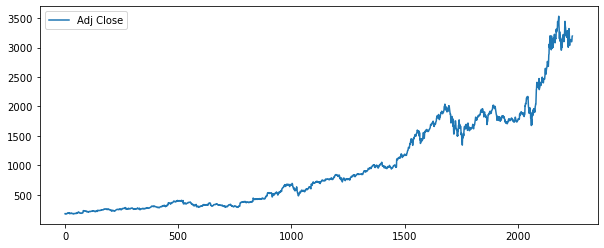

In [9]:
data['Adj Close'].plot(legend=True, figsize=(10,4))

In [10]:
#count the number of numerical and none-numerical variables (columns)
from pandas.api.types import is_numeric_dtype

n=0
for c in data.columns:
    if is_numeric_dtype(data[c]):
        n+=1
print(f"numerical variables: {n}, none-numerical vraibles: {len(data.columns) -n}")

numerical variables: 6, none-numerical vraibles: 3


In [11]:
# data cleaning - Preparing data for analytics
data.isnull()

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2237,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False
2239,False,False,False,False,False,False,False,False,False
2240,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

Date         0
Source       0
Open         1
High         2
Low          0
Close        3
Adj Close    1
Volume       0
Stock        0
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

Date         0
Source       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Stock        0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2241
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2235 non-null   object 
 1   Source     2235 non-null   object 
 2   Open       2235 non-null   float64
 3   High       2235 non-null   float64
 4   Low        2235 non-null   float64
 5   Close      2235 non-null   float64
 6   Adj Close  2235 non-null   float64
 7   Volume     2235 non-null   int64  
 8   Stock      2235 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 174.6+ KB


In [16]:
#clean abnormal values
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2.235000e+03
mean,993.545285,1003.993597,981.697208,993.336778,993.336778,4.111719e+06
std,802.275533,811.978699,790.840598,801.656749,801.656749,2.273613e+06
min,173.809998,178.250000,172.000000,175.929993,175.929993,0.000000e+00
25%,321.029998,324.475006,316.815002,322.320007,322.320007,2.687200e+06
50%,720.969971,726.429993,714.210022,722.080017,722.080017,3.525600e+06
75%,1666.029968,1681.659973,1635.654968,1663.345032,1663.345032,4.830850e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,2.385610e+07


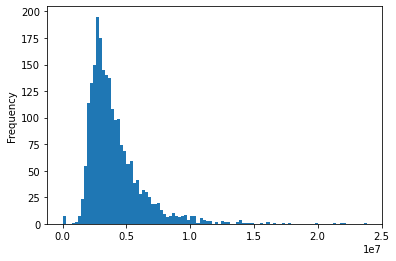

In [17]:
data['Volume'].plot(kind='hist', bins=100)

In [18]:
data['Volume'].min()

0

In [19]:
data['Volume'].max()

23856100

In [20]:
data['Volume'].sort_values().head(20)

29            0
114           1
18            5
161           6
47           23
90           25
66           78
2007     881300
245      984400
1001    1091200
126     1331700
879     1343400
426     1350600
376     1373000
497     1380400
405     1415000
411     1422600
415     1457100
1164    1458800
403     1504500
Name: Volume, dtype: int64

In [21]:
data['Volume'] > 100000

0       True
1       True
2       True
3       True
4       True
        ... 
2237    True
2238    True
2239    True
2240    True
2241    True
Name: Volume, Length: 2235, dtype: bool

In [22]:
data = data[data['Volume'] > 100000]

In [23]:
data['Volume'].sort_values().head(20)

2007     881300
245      984400
1001    1091200
126     1331700
879     1343400
426     1350600
376     1373000
497     1380400
405     1415000
411     1422600
415     1457100
1164    1458800
403     1504500
749     1513800
1167    1524100
151     1534300
417     1534700
152     1548100
1160    1563300
416     1566400
Name: Volume, dtype: int64

In [24]:
data

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/3/2012,yahoo,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,amazon
1,1/4/2012,yahoo,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,amazon
2,1/5/2012,yahoo,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,amazon
3,1/6/2012,yahoo,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,amazon
4,1/9/2012,yahoo,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,amazon
...,...,...,...,...,...,...,...,...,...
2237,11/20/2020,yahoo,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,amazon
2238,11/23/2020,yahoo,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,amazon
2239,11/24/2020,yahoo,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100,amazon
2240,11/25/2020,yahoo,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400,amazon


In [25]:
# Remove all columns that have a constant/single value
constant_columns=[]
for c in data.columns:
    n = len(data[c].unique())
    if n == 1:
        constant_columns.append(c)
        
print('constant columns: ', constant_columns)

constant columns:  ['Source', 'Stock']


In [30]:
data.drop(columns=constant_columns, axis=1, inplace=True)

KeyError: "['Source' 'Stock'] not found in axis"

In [31]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2012,175.889999,179.479996,175.550003,179.029999,179.029999,5110800
1,1/4/2012,179.210007,180.500000,176.070007,177.509995,177.509995,4205200
2,1/5/2012,175.940002,178.250000,174.050003,177.610001,177.610001,3809100
3,1/6/2012,178.070007,184.649994,177.500000,182.610001,182.610001,7008400
4,1/9/2012,182.759995,184.369995,177.000000,178.559998,178.559998,5056900
...,...,...,...,...,...,...,...
2237,11/20/2020,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400
2238,11/23/2020,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900
2239,11/24/2020,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100
2240,11/25/2020,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2241
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2228 non-null   object 
 1   Open       2228 non-null   float64
 2   High       2228 non-null   float64
 3   Low        2228 non-null   float64
 4   Close      2228 non-null   float64
 5   Adj Close  2228 non-null   float64
 6   Volume     2228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 139.2+ KB


In [35]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2.228000e+03
mean,996.019821,1006.491297,984.140637,995.807837,995.807837,4.124637e+06
std,802.316650,812.026869,790.876914,801.699249,801.699249,2.265449e+06
min,173.809998,178.250000,172.000000,175.929993,175.929993,8.813000e+05
25%,321.782501,326.707489,318.337501,323.037491,323.037491,2.693250e+06
50%,722.949982,728.595001,717.959992,725.609985,725.609985,3.528700e+06
75%,1669.000000,1683.677490,1638.182495,1664.467468,1664.467468,4.842425e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,2.385610e+07


In [36]:
dateObject = pd.DatetimeIndex(data['Date'])
dateObject

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2020-11-13', '2020-11-16', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-27'],
              dtype='datetime64[ns]', name='Date', length=2228, freq=None)

In [37]:
data['Day'] = dateObject.day
data['Month'] = dateObject.month
data['Year'] = dateObject.year
data

c:\Miniconda\envs\py37_default\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Miniconda\envs\py37_default\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Miniconda\envs\py37_default\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,1/3/2012,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,3,1,2012
1,1/4/2012,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,4,1,2012
2,1/5/2012,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,5,1,2012
3,1/6/2012,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,6,1,2012
4,1/9/2012,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,9,1,2012
...,...,...,...,...,...,...,...,...,...,...
2237,11/20/2020,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,20,11,2020
2238,11/23/2020,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,23,11,2020
2239,11/24/2020,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100,24,11,2020
2240,11/25/2020,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400,25,11,2020


In [38]:
data[['Date','Day','Month','Year']]

,Date,Day,Month,Year
0,1/3/2012,3,1,2012
1,1/4/2012,4,1,2012
2,1/5/2012,5,1,2012
3,1/6/2012,6,1,2012
4,1/9/2012,9,1,2012
...,...,...,...,...
2237,11/20/2020,20,11,2020
2238,11/23/2020,23,11,2020
2239,11/24/2020,24,11,2020
2240,11/25/2020,25,11,2020


In [40]:
result = data[['Year','Volume']].groupby('Year').sum().astype(int)
result

,Volume
Year,
2012,975492400
2013,747905700
2014,1029066700
2015,957102000
2016,1038756300
2017,882705400
2018,1417897600
2019,974729400
2020,1166035700


Text(0, 0.5, "Stock's Volume")

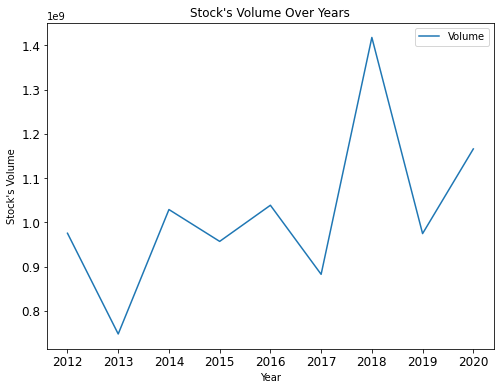

In [41]:
result.plot(figsize=(8,6),y='Volume',fontsize=12, title="Stock's Volume Over Years")
plt.ylabel("Stock's Volume")

In [42]:
result = data[['Month','Volume']].groupby('Month').sum().astype(int)
result

,Volume
Month,
1,884620500
2,846030200
3,839584500
4,890804000
5,693382700
6,671267700
7,792035200
8,633655400
9,650017700


Text(0, 0.5, "Stock's Volume")

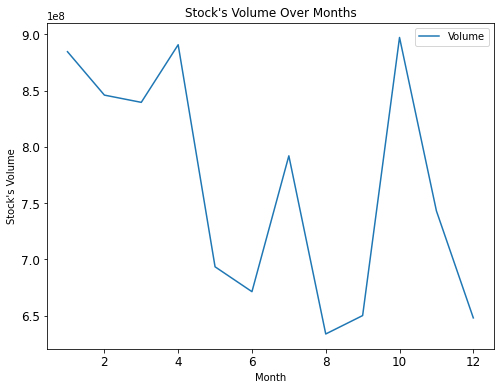

In [43]:
result.plot(figsize=(8,6), y='Volume', fontsize=12, title="Stock's Volume Over Months")
plt.ylabel("Stock's Volume")

Text(0, 0.5, "Stock's Volume")

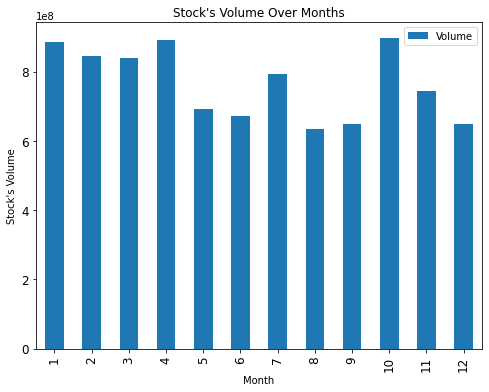

In [44]:
result.plot.bar(figsize=(8,6), y='Volume', fontsize=12, title="Stock's Volume Over Months")
plt.ylabel("Stock's Volume")

In [46]:
data[['Date','Adj Close']].groupby('Date').count()

,Adj Close
Date,
1/10/2012,1
1/10/2013,1
1/10/2014,1
1/10/2017,1
1/10/2018,1
...,...
9/9/2014,1
9/9/2015,1
9/9/2016,1


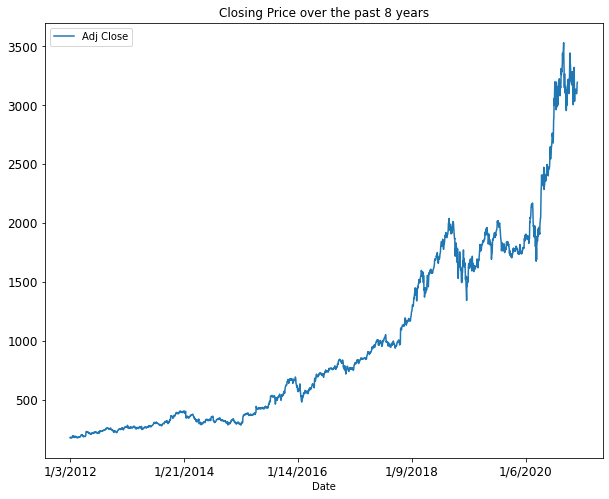

In [47]:
data[['Date','Adj Close']].plot(figsize=(10,8), x='Date', y='Adj Close', fontsize=12,
                                        title="Closing Price over the past 8 years")

In [49]:
data['Date'] = pd.to_datetime(data['Date'], format="%m/%d/%Y")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2241
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2228 non-null   datetime64[ns]
 1   Open       2228 non-null   float64       
 2   High       2228 non-null   float64       
 3   Low        2228 non-null   float64       
 4   Close      2228 non-null   float64       
 5   Adj Close  2228 non-null   float64       
 6   Volume     2228 non-null   int64         
 7   Day        2228 non-null   int64         
 8   Month      2228 non-null   int64         
 9   Year       2228 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 191.5 KB


c:\Miniconda\envs\py37_default\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


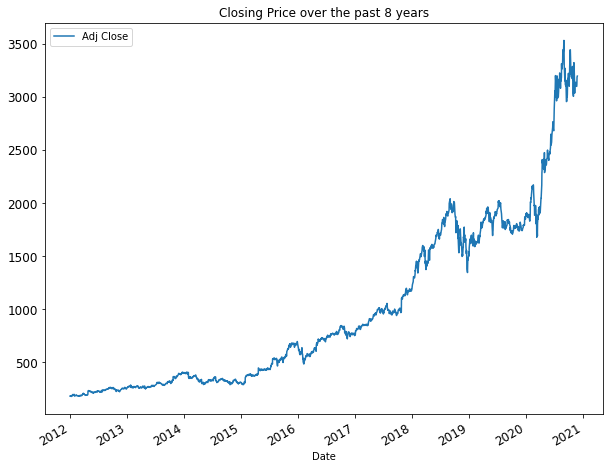

In [50]:
data[['Date','Adj Close']].plot(figsize=(10,8), x='Date', y='Adj Close', fontsize=12,
                                        title="Closing Price over the past 8 years")

In [ ]:
# Using filters for data visualization
#Plot the Adj Close prices that are smaller than the Open prices, 
# and after 2015

In [52]:
#data for year > 2015
data[data['Year'] > 2015]['Year']

1006    2016
1007    2016
1008    2016
1009    2016
1010    2016
        ... 
2237    2020
2238    2020
2239    2020
2240    2020
2241    2020
Name: Year, Length: 1236, dtype: int64

In [55]:
# query data for 'Adj Close' < 'Open' price
data[data['Adj Close'] < data['Open']][['Adj Close','Open']]

,Adj Close,Open
1,177.509995,179.210007
4,178.559998,182.759995
5,179.339996,181.100006
6,178.899994,179.639999
7,175.929993,179.419998
...,...,...
2234,3135.659912,3183.540039
2235,3105.459961,3134.000000
2237,3099.399902,3117.020020
2238,3098.389893,3116.699951


In [61]:
bool_filter1 = data['Year']>2015
bool_filter2 = data['Adj Close'] < data['Open']

In [62]:
result = data[bool_filter1 & bool_filter2]
result

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
1006,2016-01-04,656.289978,657.719971,627.510010,636.989990,636.989990,9314500,4,1,2016
1007,2016-01-05,646.859985,646.909973,627.650024,633.789978,633.789978,5822600,5,1,2016
1009,2016-01-07,621.799988,630.000000,605.210022,607.940002,607.940002,7074900,7,1,2016
1010,2016-01-08,619.659973,624.140015,606.000000,607.049988,607.049988,5512900,8,1,2016
1012,2016-01-12,625.250000,625.989990,612.239990,617.890015,617.890015,4724100,12,1,2016
...,...,...,...,...,...,...,...,...,...,...
2234,2020-11-17,3183.540039,3189.250000,3135.260010,3135.659912,3135.659912,3444700,17,11,2020
2235,2020-11-18,3134.000000,3140.000000,3105.100098,3105.459961,3105.459961,2916800,18,11,2020
2237,2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,20,11,2020
2238,2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,23,11,2020


In [60]:
result[['Open', 'Adj Close']]

,Open,Adj Close
1006,656.289978,636.989990
1007,646.859985,633.789978
1009,621.799988,607.940002
1010,619.659973,607.049988
1012,625.250000,617.890015
...,...,...
2234,3183.540039,3135.659912
2235,3134.000000,3105.459961
2237,3117.020020,3099.399902
2238,3116.699951,3098.389893


In [64]:
#Compare the average High, Low, Open, and Adj Close values/prices over months
result = data[['Month', 'High', 'Low', 'Open', 'Adj Close']].groupby('Month').mean()
result

,High,Low,Open,Adj Close
Month,,,,
1,845.138624,826.699177,835.785055,837.217747
2,869.500417,848.818237,859.158765,859.137411
3,883.179059,860.221100,871.632875,873.045287
4,935.481024,913.718432,924.956487,925.537783
5,981.422476,964.186472,972.484422,973.608949
6,1030.305523,1010.421686,1020.797158,1020.935264
7,1117.510261,1090.640261,1105.218596,1105.226407
8,1124.288736,1103.972829,1114.122626,1114.643383
9,1137.103572,1110.570271,1126.507582,1123.582474


Text(0, 0.5, "Average of Stocks' Prices")

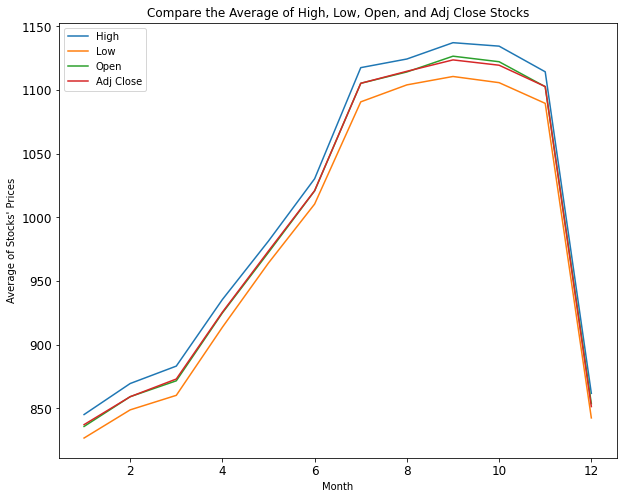

In [65]:
result.plot(figsize=(10,8), y=['High','Low', 'Open', 'Adj Close'], fontsize=12, legend=True, 
             title= 'Compare the Average of High, Low, Open, and Adj Close Stocks')
plt.ylabel("Average of Stocks' Prices")

In [66]:
#Data Queries
# Find the months that have the highest and lowest number of volume
result = data[['Month', 'Volume']].groupby('Month').sum().astype(int)
result

,Volume
Month,
1,884620500
2,846030200
3,839584500
4,890804000
5,693382700
6,671267700
7,792035200
8,633655400
9,650017700


In [68]:
result.min()

Volume    633655400
dtype: int32

In [69]:
result.max()

Volume    897270200
dtype: int32

In [70]:
result.idxmax()

Volume    10
dtype: int64

In [71]:
result.idxmin()

Volume    8
dtype: int64

In [72]:
print(f'The month with the lowest volume:  {result.idxmin()[0]}, Volume: {result.min()[0]}')

The month with the lowest volume:  8, Volume: 633655400


In [73]:
print(f'The month with the lowest volume:  {result.idxmax()[0]}, Volume: {result.max()[0]}')

The month with the lowest volume:  10, Volume: 897270200


In [74]:
# Find the Dates that have the highest and lowest number of volume
data

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,2012-01-03,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,3,1,2012
1,2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,4,1,2012
2,2012-01-05,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,5,1,2012
3,2012-01-06,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,6,1,2012
4,2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,9,1,2012
...,...,...,...,...,...,...,...,...,...,...
2237,2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,20,11,2020
2238,2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,23,11,2020
2239,2020-11-24,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100,24,11,2020
2240,2020-11-25,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400,25,11,2020


In [75]:
r = data['Volume']
r

0       5110800
1       4205200
2       3809100
3       7008400
4       5056900
         ...   
2237    3374400
2238    4708900
2239    3602100
2240    3790400
2241    2392900
Name: Volume, Length: 2228, dtype: int64

In [76]:
l = r.idxmax()
s = r.idxmin()

In [77]:
l

773

In [78]:
s

2007

In [80]:
data.iloc[l]['Date'].date()

datetime.date(2015, 2, 20)

In [81]:
data.iloc[s]['Date'].date()

datetime.date(2020, 1, 15)

In [82]:
print('The date with the lowest volume', data.iloc[s]['Date'].date(), ' Volume', data.iloc[s]['Volume'])

The date with the lowest volume 2020-01-15  Volume 2896600


In [83]:
print('The date with the highest volume', data.iloc[l]['Date'], ' Volume', data.iloc[l]['Volume'])

The date with the highest volume 2015-02-20 00:00:00  Volume 3258000


In [84]:
# Find the month and day that has the lowest 
# (Adj Close) closing average price!
r=data[['Month','Day','Adj Close']].groupby(['Month','Day']).mean()
r

Adj Close
Month Day            
1     2    931.658335
      3    881.009992
      4    769.301659
      5    624.636002
      6    700.508339
...               ...
12    27   988.581681
      28   871.326001
      29   735.157494
      30   797.900000
      31   830.951660

[363 rows x 1 columns]

In [85]:
r.idxmax()

Adj Close    (9, 1)
dtype: object

In [86]:
r.idxmin()

Adj Close    (2, 29)
dtype: object

In [89]:
print(f"{r.idxmax()[0]} and {r.idxmin()[0]}")

(9, 1) and (2, 29)


In [90]:
#Show the Closing, Open, Volume, Year, Month, Day, of the Highest 'Adj Close'
r = data.loc[data['Adj Close'].idxmax()]
r

Date         2020-09-02 00:00:00
Open                        3547
High                     3552.25
Low                      3486.69
Close                    3531.45
Adj Close                3531.45
Volume                   3931500
Day                            2
Month                          9
Year                        2020
Name: 2181, dtype: object

In [91]:
print("Closing, ", r['Close'], ' Open: ', r['Open'], ' Year: ', 
      r['Year'], ' Month: ', r['Month'], ' Day: ', r['Day'],
        ' Volume: ', r['Volume'])

Closing,  3531.4499509999996
